# Chapter 11. Future Directions 

## Scaling Transformers 

Scaling laws allow us to quantify large LMs with barying compute budget, dataset size and model size. The basic idea is to chart the dependence of the cross-entropy loss on these three factors. 

For example, the curves for GPT family models can give us following points:

* For better models, focus on increasing the three factors. 
* Since there is a relation between the test loss and the three factors as $L(X)\approx 1/(N,C,D)^{\alpha}$, so that the loss curve can be extrapolated to predict what the approximate loss would be. 
* Large models are able to reach same performance as smaller models with smaller number of training steps. 

Scaling up seems simple in theory, but in practice there are challenges: infrastructure, cost, dataset size, model evaluation are few of them. 

## Attention 

The self-attention layer in Transformer is a bottleneck since it can scale like $\bigO(n^2)$, where n is the sequence length. Recent researchers propose ways to use self-attention more efficiently. 

* **Sparse Attention:** reduces the number of computations in self-attention layer. Common atomic sparse attention patterns are applied for self-attention: global, band, dilated, random, block. The sparse attention allows the model to process longer sequences (like LongFormer, BigBird). 

* **Linearized Attention:** expresses the similarity function as a kernal function that decomposes the operation into two pieces. So, we can easily linearize the space and time complexity of self-attention. 


In [ ]:
!pip install transformers 
!pip install datasets

## Beyond Text 

* **Vision:** iGPT, Vision Transformer (ViT)  

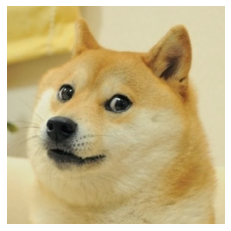

In [5]:
# Loading ViT 
from PIL import Image
import matplotlib.pyplot as plt

image = Image.open("images/doge.jpg")
plt.imshow(image)
plt.axis("off")
plt.show()

In [6]:
import pandas as pd
from transformers import pipeline

image_classifier = pipeline("image-classification")
preds = image_classifier(image)
preds_df = pd.DataFrame(preds)
preds_df

No model was supplied, defaulted to google/vit-base-patch16-224 and revision 5dca96d (https://huggingface.co/google/vit-base-patch16-224).
Using a pipeline without specifying a model name and revision in production is not recommended.


/usr/local/lib/python3.8/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


,score,label
0,0.643277,"Eskimo dog, husky"
1,0.208494,Siberian husky
2,0.059326,"dingo, warrigal, warragal, Canis dingo"
3,0.035176,"Norwegian elkhound, elkhound"
4,0.013209,"malamute, malemute, Alaskan malamute"


* Table: TAPAS (process tabular information) 

In [7]:
# Loading TAPAS 
book_data = [
    {"chapter": 0, "name": "Introduction", "start_page": 1, "end_page": 11},
    {"chapter": 1, "name": "Text classification", "start_page": 12,
     "end_page": 48},
    {"chapter": 2, "name": "Named Entity Recognition", "start_page": 49,
     "end_page": 73},
    {"chapter": 3, "name": "Question Answering", "start_page": 74,
     "end_page": 120},
    {"chapter": 4, "name": "Summarization", "start_page": 121,
     "end_page": 140},
    {"chapter": 5, "name": "Conclusion", "start_page": 141,
     "end_page": 144}
]

In [8]:
table = pd.DataFrame(book_data)
table['number_of_pages'] = table['end_page']-table['start_page']
table = table.astype(str)
table

,chapter,name,start_page,end_page,number_of_pages
0,0,Introduction,1,11,10
1,1,Text classification,12,48,36
2,2,Named Entity Recognition,49,73,24
3,3,Question Answering,74,120,46
4,4,Summarization,121,140,19
5,5,Conclusion,141,144,3


In [ ]:
table_qa = pipeline("table-question-answering")


In [10]:
table_qa = pipeline("table-question-answering")
queries = ["What's the topic in chapter 4?",
           "What is the total number of pages?",
           "On which page does the chapter about question-answering start?",
           "How many chapters have more than 20 pages?"]
preds = table_qa(table, queries)

No model was supplied, defaulted to google/tapas-base-finetuned-wtq and revision 69ceee2 (https://huggingface.co/google/tapas-base-finetuned-wtq).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.8/dist-packages/transformers/models/tapas/modeling_tapas.py:1786: UserWarning: scatter_reduce() is in beta and the API may change at any time. (Triggered internally at ../aten/src/ATen/native/TensorAdvancedIndexing.cpp:1615.)
  segment_means = out.scatter_reduce(


In [11]:
for query, pred in zip(queries, preds):
    print(query)
    if pred["aggregator"] == "NONE":
        print("Predicted answer: " + pred["answer"])
    else:
        print("Predicted answer: " + pred["answer"])
    print('='*50)

What's the topic in chapter 4?
Predicted answer: Summarization
What is the total number of pages?
Predicted answer: SUM > 10, 36, 24, 46, 19, 3
On which page does the chapter about question-answering start?
Predicted answer: AVERAGE > 74
How many chapters have more than 20 pages?
Predicted answer: COUNT > 1, 2, 3


* Speech and Text: Wav2Vec2 

In [ ]:
asr = pipeline("automatic-speech-recognition")


In [13]:
from datasets import load_dataset

ds = load_dataset("superb", "asr", split="validation[:1]")
print(ds[0])

Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/28539 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2703 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2620 [00:00<?, ? examples/s]

Dataset superb downloaded and prepared to /root/.cache/huggingface/datasets/superb/asr/1.9.0/b8183f71eabe8c559d7f3f528ab37a6a21ad1ee088fd3423574cecad8b3ec67e. Subsequent calls will reuse this data.
{'file': '/root/.cache/huggingface/datasets/downloads/extracted/3f10e98d93ce608ac22fb2e825d2ce49a34482b4557f18c9c6f6106e31abe246/LibriSpeech/dev-clean/1272/128104/1272-128104-0000.flac', 'audio': {'path': '/root/.cache/huggingface/datasets/downloads/extracted/3f10e98d93ce608ac22fb2e825d2ce49a34482b4557f18c9c6f6106e31abe246/LibriSpeech/dev-clean/1272/128104/1272-128104-0000.flac', 'array': array([0.00238037, 0.0020752 , 0.00198364, ..., 0.00042725, 0.00057983,
       0.0010376 ], dtype=float32), 'sampling_rate': 16000}, 'text': 'MISTER QUILTER IS THE APOSTLE OF THE MIDDLE CLASSES AND WE ARE GLAD TO WELCOME HIS GOSPEL', 'speaker_id': 1272, 'chapter_id': 128104, 'id': '1272-128104-0000'}


In [14]:
import soundfile as sf

def map_to_array(batch):
    speech, _ = sf.read(batch["file"])
    batch["speech"] = speech
    return batch

ds = ds.map(map_to_array)

Map:   0%|          | 0/1 [00:00<?, ? examples/s]

In [15]:
from IPython.display import Audio

display(Audio(ds[0]['speech'], rate=16000))

In [ ]:
pred = asr(ds[0]["speech"])
print(pred)

* Vision and Text: VQA, LayoutLM, DALL-E, CLIP 

In [17]:
# CLIP model 
from transformers import CLIPProcessor, CLIPModel

clip_ckpt = "openai/clip-vit-base-patch32"
model = CLIPModel.from_pretrained(clip_ckpt)
processor = CLIPProcessor.from_pretrained(clip_ckpt)

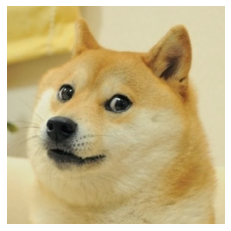

In [18]:
image = Image.open("images/doge.jpg")
plt.imshow(image)
plt.axis("off")
plt.show()

In [19]:
import torch

texts = ["a photo of a dog", "a photo of a husky", "a photo of an animal"]
inputs = processor(text=texts, images=image, return_tensors="pt", padding=True)
with torch.no_grad():
    outputs = model(**inputs)
logits_per_image = outputs.logits_per_image
probs = logits_per_image.softmax(dim=1)
probs

tensor([[0.8381, 0.1053, 0.0566]])